<a href="https://colab.research.google.com/github/AsetMuratuly/aq_workshop/blob/main/aq_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
data = pd.read_csv('data_taiwan.csv', low_memory=False)

value_columns = ['SO2', 'CO', 'O3', 'PM2.5', 'NO2', 'AMB_TEMP', 'RAINFALL', 'RH', 'WS_HR']
data = data[['time', 'station'] + value_columns].copy()
data = data[data['station'].isin(['Yonghe', 'Wanhua', 'Xindian'])].copy()
data['RAINFALL'] = data['RAINFALL'].replace('NR', 0)

# convert to numeric, errors='coerce' will convert non-numeric values to NaN
for col in value_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna()

data['time'] = pd.to_datetime(data['time'], format='%Y/%m/%d %H:%M')

In [5]:
correlation_matrix = data[value_columns].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)


Correlation matrix:
               SO2        CO        O3     PM2.5       NO2  AMB_TEMP  \
SO2       1.000000  0.268813  0.014225  0.350823  0.449401  0.096423   
CO        0.268813  1.000000 -0.273552  0.354130  0.731968  0.025817   
O3        0.014225 -0.273552  1.000000  0.226600 -0.209432  0.053303   
PM2.5     0.350823  0.354130  0.226600  1.000000  0.414775 -0.101624   
NO2       0.449401  0.731968 -0.209432  0.414775  1.000000 -0.004525   
AMB_TEMP  0.096423  0.025817  0.053303 -0.101624 -0.004525  1.000000   
RAINFALL -0.042211 -0.045991  0.001268 -0.057234 -0.028379  0.010299   
RH       -0.143835  0.000996 -0.467923 -0.215431 -0.044695 -0.342672   
WS_HR    -0.097249 -0.358833  0.237644 -0.157489 -0.342668 -0.013378   

          RAINFALL        RH     WS_HR  
SO2      -0.042211 -0.143835 -0.097249  
CO       -0.045991  0.000996 -0.358833  
O3        0.001268 -0.467923  0.237644  
PM2.5    -0.057234 -0.215431 -0.157489  
NO2      -0.028379 -0.044695 -0.342668  
AMB_TEMP  0.

In [6]:
# basic t-test example
yonghe_data = data[data['station'] == 'Yonghe']['PM2.5']
wanhua_data = data[data['station'] == 'Wanhua']['PM2.5']

t_statistic, p_value = stats.ttest_ind(yonghe_data, wanhua_data, equal_var=False)

print(f"\nComparing PM2.5 between Yonghe and Wanhua stations:")
print(f"Mean PM2.5 (Yonghe): {yonghe_data.mean():.2f}")
print(f"Mean PM2.5 (Wanhua): {wanhua_data.mean():.2f}")
print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")


Comparing PM2.5 between Yonghe and Wanhua stations:
Mean PM2.5 (Yonghe): 18.39
Mean PM2.5 (Wanhua): 18.98
T-statistic: -2.807
P-value: 0.005


In [7]:
# === normality test ===
if len(yonghe_data) > 5000:
    print(f"Dataset for Yonghe PM2.5 is very large ({len(yonghe_data)}). Using a sample for Shapiro-Wilk test.")
    sample_data = yonghe_data.sample(n=5000, random_state=42) # Take a random sample
else:
    sample_data = yonghe_data

shapiro_stat, shapiro_p = stats.shapiro(sample_data)
print(f"\nShapiro-Wilk Test for Yonghe PM2.5 (sample size: {len(sample_data)}):")
print(f"Statistic: {shapiro_stat:.3f}, P-value: {shapiro_p:.3f}")

if shapiro_p < 0.05:
    print("Conclusion: The PM2.5 data for Yonghe is likely not normally distributed (p < 0.05).")
else:
    print("Conclusion: The PM2.5 data for Yonghe appears to be normally distributed (p >= 0.05).")

Dataset for Yonghe PM2.5 is very large (8210). Using a sample for Shapiro-Wilk test.

Shapiro-Wilk Test for Yonghe PM2.5 (sample size: 5000):
Statistic: 0.889, P-value: 0.000
Conclusion: The PM2.5 data for Yonghe is likely not normally distributed (p < 0.05).


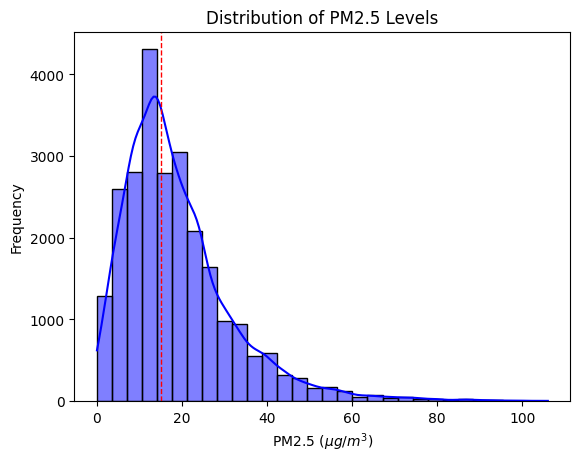

In [9]:
sns.histplot(data['PM2.5'], bins=30, kde=True, color='blue')
plt.title('Distribution of PM2.5 Levels')
plt.xlabel(r'PM2.5 ($\mu g/m^3$)')
plt.ylabel('Frequency')
plt.axvline(15, color='red', linestyle='dashed', linewidth=1, label='Mean PM2.5')

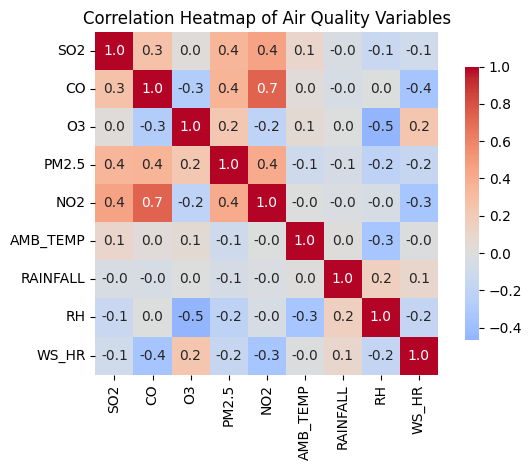

In [11]:
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, center=0)
plt.title('Correlation Heatmap of Air Quality Variables')
plt.tight_layout()
plt.show()

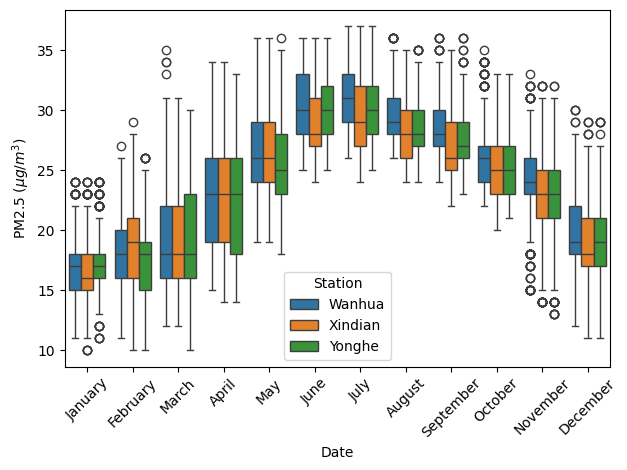

In [14]:
sns.boxplot(
    data=data,
    x=data['time'].dt.month_name(),
    y='AMB_TEMP',
    hue='station'
)
plt.xlabel('Date')
plt.ylabel(r'PM2.5 ($\mu g/m^3$)')
plt.xticks(rotation=45)
plt.legend(title='Station')
plt.tight_layout()
plt.show()